In [1]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

Using TensorFlow backend.


In [2]:
# Loading the data
data = []
labels = []
classes = 43
cur_path = os.getcwd()

for i in range(classes):
    path = os.path.join(cur_path, 'train', str(i))
    images = os.listdir(path)
    
    for a in images:
        try:
            image = Image.open(path + '\\' + a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image.")
data = np.array(data)
labels = np.array(labels)

In [3]:
# Verifying data is loaded properly
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [4]:
# Splitting the training data in this manner: 80% for training, 20% for validation
X_train, X_valid, y_train, y_valid = train_test_split(data, labels, test_size = 0.2, random_state = 42)

print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [ ]:
# A peek into what the training data looks like
W_grid = 5

L_grid = 5

fig, axes = plt.subplots(L_grid, W_grid, figsize = (30, 30))

axes = axes.ravel()

n_training = len(X_train)

for i in np.arange(0, L_grid * W_grid):
    
    index = np.random.randint(0, n_training)
    
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index], fontsize = 15)
    axes[i].axis('off')
    
plt.subplots_adjust(hspace = 0.4)

In [ ]:
# One-hot encoding
y_train = to_categorical(y_train, 43)
y_valid = to_categorical(y_test, 43)

In [ ]:
# Sequential CNN model (By Syed Muhammad Shiraz Jafri)
model = Sequential()
# 1st 2 Convolutional Layers
model.add(Conv2D(filters = 32, kernel_size = (5, 5), activation = 'relu', input_shape = X_train.shape[1:]))
model.add(Conv2D(filters = 32, kernel_size = (5, 5), activation = 'relu'))
# 1st Pooling Layer
model.add(MaxPool2D(pool_size = (2,2)))
# 1st Dropout Layer at 50% to avoid overfitting
model.add(Dropout(rate = 0.25))
# 2nd 2 Convolutional Layers
model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
# 2nd Pooling Layer
model.add(MaxPool2D(pool_size = (2,2)))
# 2nd Dropout Layer at 25%
model.add(Dropout(rate = 0.25))
# Flattening layer to generate one vector as input to the dense fully connected layer
model.add(Flatten())
# Dense Fully Connected Network
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(rate = 0.5))
# Output Layer
model.add(Dense(43, activation = 'softmax'))

#Summarizing the model
model.summary()

In [ ]:
# Compiling the model using Adam as the gradient descent algorithm with Softmax Loss as the function for Loss
model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [ ]:
# After hit and trial, 15 epochs and a batch size of 64 produced stable results
epochs = 15
history = model.fit(X_train, y_train, batch_size = 64, epochs = epochs, validation_data = (X_valid, y_valid))

In [ ]:
# Functions to plot the accuracy and the loss as the training goes on
def accuracy_plot():
    plt.figure(0)
    plt.plot(history.history['accuracy'], label='training accuracy')
    plt.plot(history.history['val_accuracy'], label='val accuracy')
    plt.title('Accuracy')
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.legend()
    plt.show()
    
def loss_plot():
    plt.figure(1)
    plt.plot(history.history['loss'], label='training loss')
    plt.plot(history.history['val_loss'], label='val loss')
    plt.title('Loss')
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.legend()
    plt.show()

In [ ]:
accuracy_plot()
loss_plot()

In [ ]:
# Saving the model for future use in the GUI
model.save('my_model.h5')

In [ ]:
from sklearn.metrics import accuracy_score

y_test = pd.read_csv('Test.csv')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data = []

for img in imgs:
    image = Image.open(img)
    image = image.resize((30, 30))    
    data.append(np.array(image))
    
X_test = np.array(data)
pred = model.predict_classes(X_test)

print(accuracy_score(labels, pred))

In [ ]:
y_true = y_test

L = 5

W = 5

fig, axes = plt.subplots(L, W, figsize = (30, 30))

axes = axes.ravel()

for i in np.arange(0, L * W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}' .format(pred[i], labels[i]), fontsize = 15)
    axes[i].axis('off')
    
plt.subplots_adjust(wspace = 0.5)

In [5]:
# Combined simple CNN by Syed Muhammad Shiraz Jafri and Muhammad Ali Alam
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [6]:
X_train_gray = np.sum(X_train / 3, axis = 3, keepdims = True)
X_valid_gray = np.sum(X_valid / 3, axis = 3, keepdims = True)
print(X_train_gray.shape, X_valid_gray.shape)

(31367, 30, 30, 1) (7842, 30, 30, 1)


In [7]:
X_train_gray_norm = (X_train_gray - 128) / 128
X_valid_gray_norm = (X_valid_gray - 128) / 128

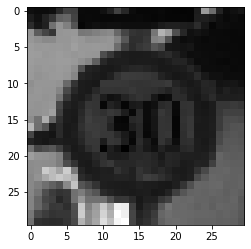

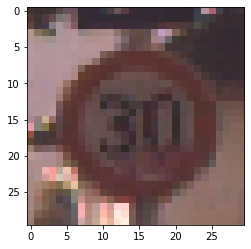

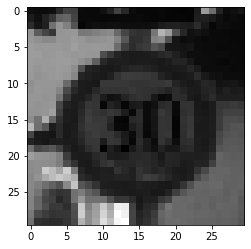

In [8]:
# Visualizing the grayscale image
i = np.random.randint(1, len(X_train_gray_norm))
plt.imshow(X_train_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap = 'gray')

In [9]:
from tensorflow.keras import datasets, layers, models

combined_model = tf.keras.Sequential()

combined_model.add(layers.Conv2D(64, (5, 5), activation = 'relu', input_shape = (30, 30, 1)))
combined_model.add(layers.AveragePooling2D())

combined_model.add(layers.Dropout(0.25))

combined_model.add(layers.Conv2D(32, (5, 5), activation = 'relu'))
combined_model.add(layers.AveragePooling2D())

combined_model.add(layers.Flatten())

combined_model.add(layers.Dense(256, activation = 'relu'))
combined_model.add(layers.Dropout(0.5))

combined_model.add(layers.Dense(128, activation = 'relu'))
combined_model.add(layers.Dropout(0.25))

combined_model.add(layers.Dense(43, activation = 'softmax'))

combined_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        1664      
_________________________________________________________________
average_pooling2d (AveragePo (None, 13, 13, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 9, 9, 32)          51232     
_________________________________________________________________
average_pooling2d_1 (Average (None, 4, 4, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               1

In [10]:
combined_model.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [11]:
history_combined = combined_model.fit(X_train_gray_norm,
                                     y_train,
                                     batch_size = 512,
                                     epochs = 20,
                                     verbose = 1,
                                     validation_data = (X_valid_gray_norm, y_valid))

Train on 31367 samples, validate on 7842 samples
Epoch 1/20
31367/31367 [==============================] - 48s 2ms/sample - loss: 3.2530 - accuracy: 0.1444 - val_loss: 2.2450 - val_accuracy: 0.4274
Epoch 2/20
31367/31367 [==============================] - 44s 1ms/sample - loss: 1.8157 - accuracy: 0.4817 - val_loss: 1.0059 - val_accuracy: 0.7132
Epoch 3/20
31367/31367 [==============================] - 46s 1ms/sample - loss: 1.1191 - accuracy: 0.6586 - val_loss: 0.6549 - val_accuracy: 0.8063
Epoch 4/20
31367/31367 [==============================] - 47s 1ms/sample - loss: 0.8271 - accuracy: 0.7411 - val_loss: 0.4988 - val_accuracy: 0.8532
Epoch 5/20
31367/31367 [==============================] - 43s 1ms/sample - loss: 0.6697 - accuracy: 0.7911 - val_loss: 0.3781 - val_accuracy: 0.8922
Epoch 6/20
31367/31367 [==============================] - 45s 1ms/sample - loss: 0.5583 - accuracy: 0.8237 - val_loss: 0.3161 - val_accuracy: 0.9095
Epoch 7/20
31367/31367 [==============================] -

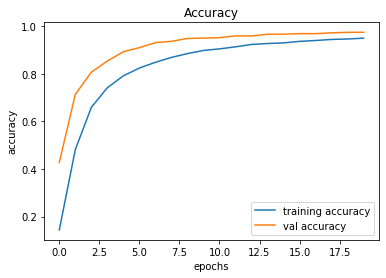

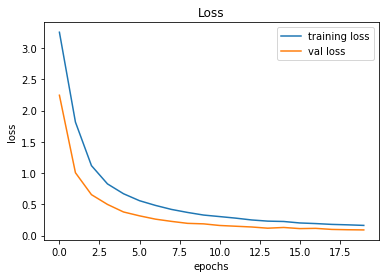

In [12]:
plt.figure(0)
plt.plot(history_combined.history['accuracy'], label='training accuracy')
plt.plot(history_combined.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
    
plt.figure(1)
plt.plot(history_combined.history['loss'], label='training loss')
plt.plot(history_combined.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [15]:
from sklearn.metrics import accuracy_score

y_test = pd.read_csv('Test.csv')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data = []

for img in imgs:
    image = Image.open(img)
    image = image.resize((30, 30))    
    data.append(np.array(image))
    
X_test = np.array(data)

X_test_gray = np.sum(X_test / 3, axis = 3, keepdims = True)

X_test_gray_norm = (X_test_gray - 128) / 128

pred = combined_model.predict_classes(X_test_gray_norm)

print(accuracy_score(labels, pred))

0.9244655581947744


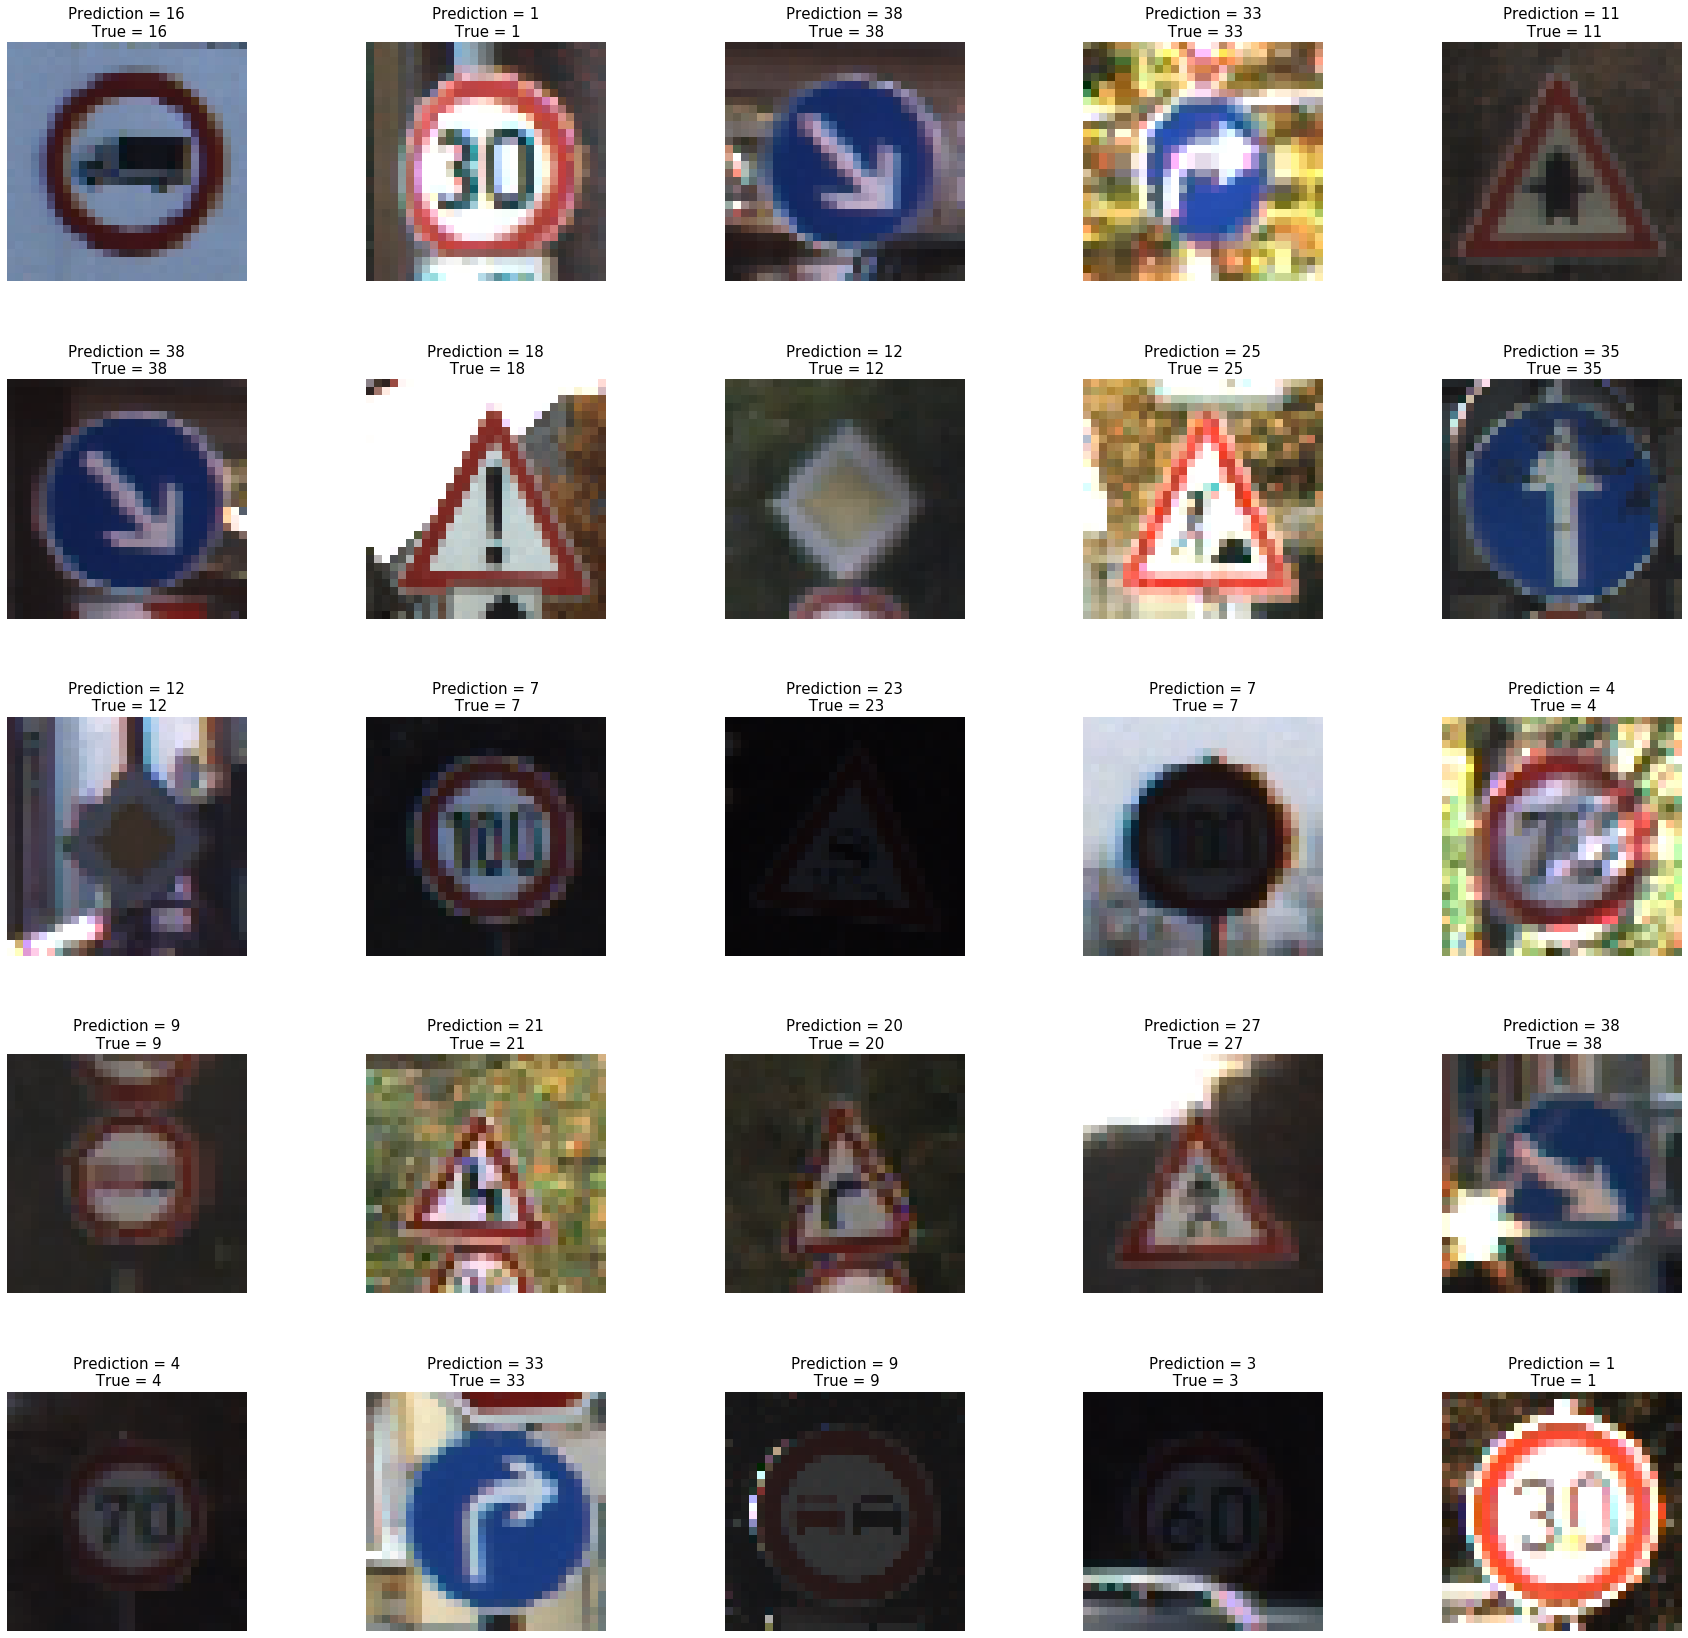

In [17]:
y_true = y_test

L = 5

W = 5

fig, axes = plt.subplots(L, W, figsize = (30, 30))

axes = axes.ravel()

for i in np.arange(0, L * W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}' .format(pred[i], labels[i]), fontsize = 15)
    axes[i].axis('off')
    
plt.subplots_adjust(wspace = 0.5)

In [18]:
combined_model.save('combined_model.h5')

In [ ]:
# ANN model by Muhammad Ali Alam
import cv2
# Loading the data
data = []
labels = []
classes = 43
cur_path = os.getcwd()

for i in range(classes):
    path = os.path.join(cur_path, 'train', str(i))
    images = os.listdir(path)
    
    for a in images:
        try:
            image = cv2.imread(os.path.join(path, a), cv2.IMREAD_GRAYSCALE)
            image = cv2.resize((image), (30, 30))
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image.")
data = np.array(data)
labels = np.array(labels)

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(data, labels, test_size = 0.1, random_state = 42)



X_train = X_train.reshape(X_train.shape[0], 900).astype('float32') 
X_valid = X_valid.reshape(X_valid.shape[0], 900).astype('float32') 



X_train = X_train / 255
X_valid = X_valid / 255



y_train = to_categorical(y_train, 43)
y_valid = to_categorical(y_valid, 43)

print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)

In [ ]:
num_pixels = 900
model_ali = Sequential()
model_ali.add(Dense(num_pixels, activation='relu', input_shape=(num_pixels,)))
model_ali.add(Dropout(0.2))
model_ali.add(Dense(100, activation='relu'))
model_ali.add(Dense(43, activation='softmax'))
    
    
# compile model
model_ali.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history_ali = model_ali.fit(X_train, y_train, batch_size = 64, validation_data=(X_valid, y_valid), epochs = 12, verbose = 2)

In [ ]:
model_ali.save('ali_model.h5')

In [ ]:
def accuracy_plot_ali():
    plt.figure(0)
    plt.plot(history_ali.history['accuracy'], label='training accuracy')
    plt.plot(history_ali.history['val_accuracy'], label='val accuracy')
    plt.title('Accuracy')
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.legend()
    plt.show()
    
def loss_plot_ali():
    plt.figure(1)
    plt.plot(history_ali.history['loss'], label='training loss')
    plt.plot(history_ali.history['val_loss'], label='val loss')
    plt.title('Loss')
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.legend()
    plt.show()

In [ ]:
accuracy_plot_ali()
loss_plot_ali()

In [ ]:
y_test = pd.read_csv('Test.csv')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data = []

for img in imgs:
    image = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize((image), (30, 30))
    data.append(np.array(image))
    
X_test = np.array(data)

X_test = X_test.reshape(X_test.shape[0], 900).astype('float32')

X_test = X_test / 255

pred = model_ali.predict_classes(X_test)

print(accuracy_score(labels, pred))

In [ ]:
L = 5

W = 5

fig, axes = plt.subplots(L, W, figsize = (30, 30))

axes = axes.ravel()

for i in np.arange(0, L * W):
    axes[i].imshow(data[i])
    axes[i].set_title('Prediction = {}\n True = {}' .format(pred[i], labels[i]), fontsize = 15)
    axes[i].axis('off')
    
plt.subplots_adjust(wspace = 0.5)